# Árvore de Decisão

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import plotly

# Modelo Árvore de Decisão

In [6]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito

In [3]:
df_risco = pd.read_csv('risco_credito.csv')
print(df_risco.shape)
df_risco.head()

(14, 5)


,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [7]:
print(df_risco.info())
df_risco.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   historia   14 non-null     object
 1   divida     14 non-null     object
 2   garantias  14 non-null     object
 3   renda      14 non-null     object
 4   risco      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes
None


,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,3,2,2,3,3
top,boa,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


## Pré-processamento

In [8]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    X_risco, y_risco = pickle.load(f)

In [10]:
print(X_risco.shape)
print(y_risco.shape)

(14, 4)
(14,)


## Treinamento

In [11]:
arvore_risco = DecisionTreeClassifier(criterion='entropy')
arvore_risco.fit(X_risco, y_risco)

DecisionTreeClassifier(criterion='entropy')

In [14]:
print(df_risco.columns[0:4])
arvore_risco.feature_importances_

Index(['historia', 'divida', 'garantias', 'renda'], dtype='object')


array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

## Visualização

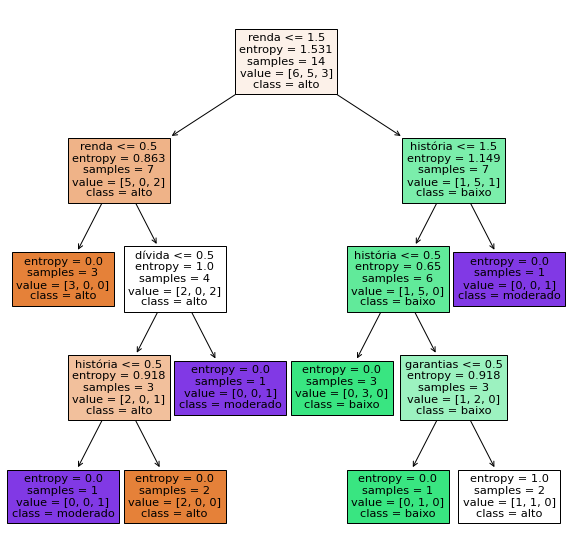

In [22]:
from sklearn import tree
previsores = ['história', 'dívida','garantias', 'renda']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
tree.plot_tree(arvore_risco, feature_names=previsores, class_names=arvore_risco.classes_, filled=True);

Testando registros:
- História: Boa (0)
- Dívida: Alta (0)
- Garantias: Nenhuma (1)
- Renda > 35 (2)

e

- História: Ruim (2)
- Dívida: Alta (0)
- Garantias: Adequada (0)
- Renda < 15 (0)

In [25]:
previsoes = arvore_risco.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base Credit data

In [27]:
df_credit = pd.read_csv('../Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data.csv')
print(df_credit.shape)
df_credit.head()

(2000, 5)


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## Pré-processamento

In [28]:
with open('credit.pkl', 'rb') as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [29]:
print(X_credit_train.shape, y_credit_train.shape)
print(X_credit_test.shape, y_credit_test.shape)

(1500, 3) (1500,)
(500, 3) (500,)


## Implementação Árvore

In [30]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
previsoes = arvore_credit.predict(X_credit_test)
previsoes.shape

(500,)

## Comparando

In [33]:
from sklearn.metrics import accuracy_score, classification_report

In [34]:
accuracy_score(y_credit_test, previsoes)

0.982

In [35]:
from yellowbrick.classifier import ConfusionMatrix

0.982

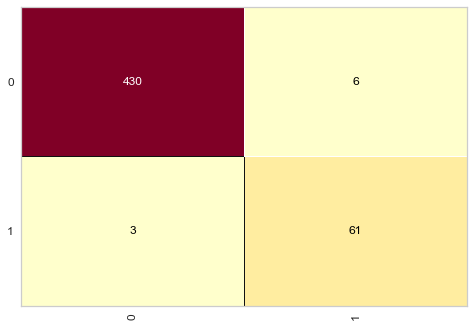

In [36]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [37]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



## Visualização

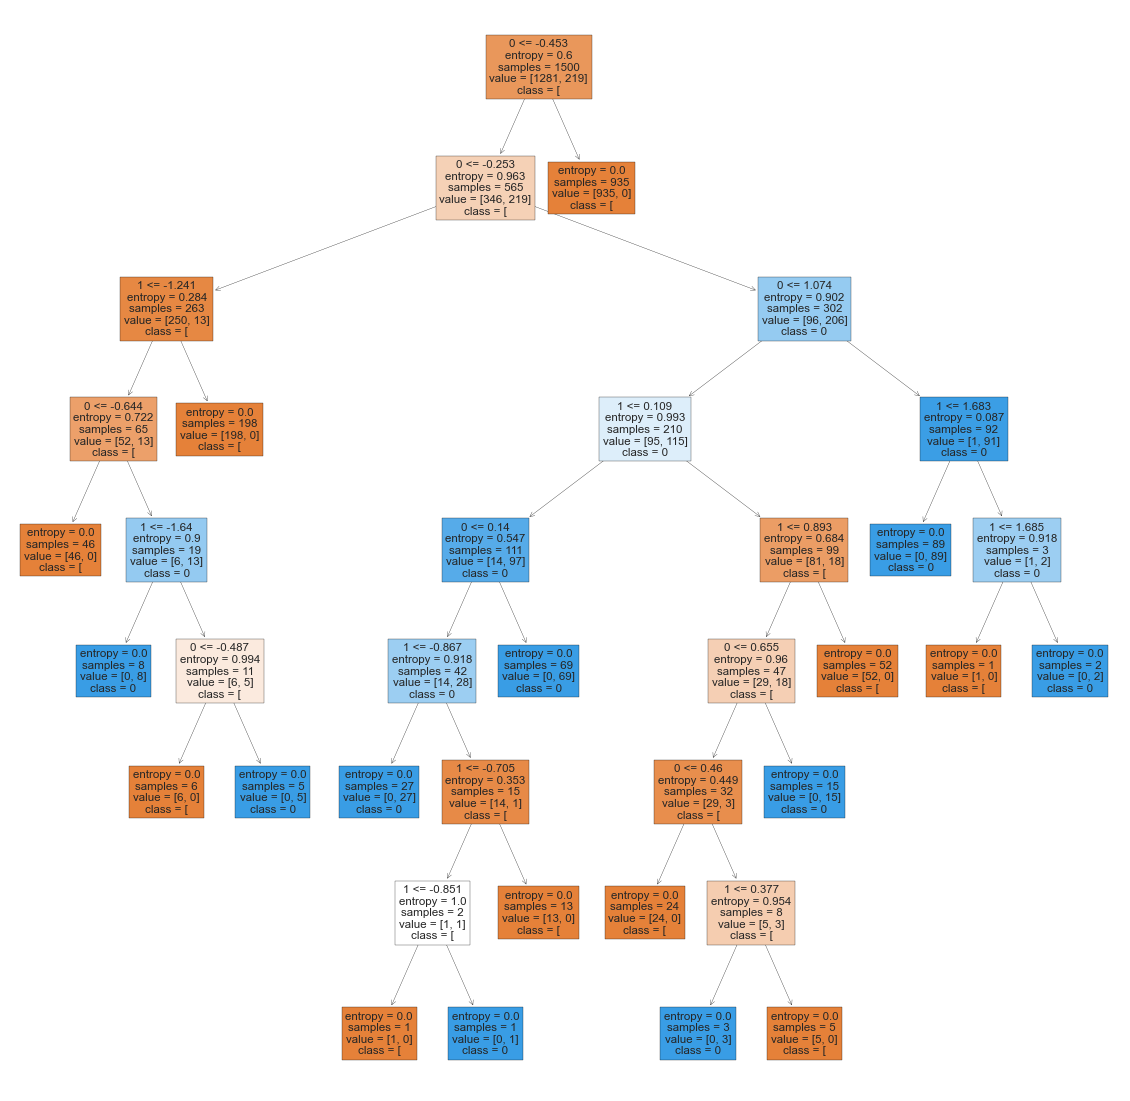

In [41]:
previsores = ['income','age','loan']
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=[20,20])
tree.plot_tree(arvore_credit, feature_names=previsoes, class_names=str(arvore_credit.classes_), filled=True);

## Base Census

In [26]:
census = pd.read_csv('../Machine Learning e Data Science com Python de A à Z/Bases de dados/census.csv')
print(census.shape)
census.head()

(32561, 15)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Pré-processamento

In [42]:
with open ('census.pkl', 'rb') as f:
    X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(f)

In [43]:
print(X_census_train.shape, y_census_train.shape)
print(X_census_test.shape, y_census_test.shape)

(27676, 108) (27676,)
(4885, 108) (4885,)


## Implementação árvore

In [44]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
previsoes = arvore_census.predict(X_census_test)
previsoes.shape

(4885,)

0.8104401228249745

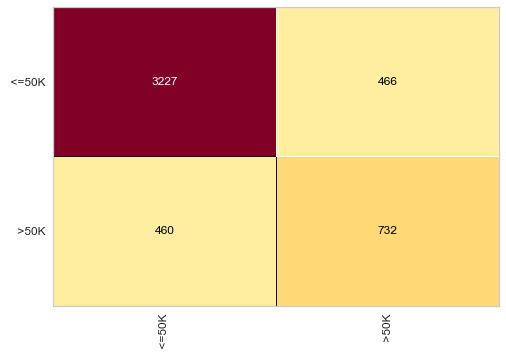

In [47]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [48]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



Census está com OneHotEncoding, não dá pra visualizar a árvore direito